In [3]:
pip install np_utils

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm
from tensorflow.keras import layers, models
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [5]:
dataset_dir="C:/Users/DELL/Desktop/Major Project/CNN-Dataset"

In [6]:
imgpath=[]
for (dirnames, foldernames, filenames) in os.walk(dataset_dir):  
    print(dirnames,foldernames,filenames)
    for filename in filenames:
        if (filename[-3:]=='png'): 
            imgpath.append(os.path.join(dirnames, filename)) 

C:/Users/DELL/Desktop/Major Project/CNN-Dataset ['COVID', 'Normal', 'Viral Pneumonia'] ['CPN_Model.h5']
C:/Users/DELL/Desktop/Major Project/CNN-Dataset\COVID [] ['COVID-1.png', 'COVID-10.png', 'COVID-100.png', 'COVID-1000.png', 'COVID-1001.png', 'COVID-1002.png', 'COVID-1003.png', 'COVID-1004.png', 'COVID-1005.png', 'COVID-1006.png', 'COVID-1007.png', 'COVID-1008.png', 'COVID-1009.png', 'COVID-101.png', 'COVID-1010.png', 'COVID-1011.png', 'COVID-1012.png', 'COVID-1013.png', 'COVID-1014.png', 'COVID-1015.png', 'COVID-1016.png', 'COVID-1017.png', 'COVID-1018.png', 'COVID-1019.png', 'COVID-102.png', 'COVID-1020.png', 'COVID-1021.png', 'COVID-1022.png', 'COVID-1023.png', 'COVID-1024.png', 'COVID-1025.png', 'COVID-1026.png', 'COVID-1027.png', 'COVID-1028.png', 'COVID-1029.png', 'COVID-103.png', 'COVID-1030.png', 'COVID-1031.png', 'COVID-1032.png', 'COVID-1033.png', 'COVID-1034.png', 'COVID-1035.png', 'COVID-1036.png', 'COVID-1037.png', 'COVID-1038.png', 'COVID-1039.png', 'COVID-104.png', 'C

C:/Users/DELL/Desktop/Major Project/CNN-Dataset\Viral Pneumonia [] ['Viral Pneumonia-1.png', 'Viral Pneumonia-10.png', 'Viral Pneumonia-100.png', 'Viral Pneumonia-1000.png', 'Viral Pneumonia-1001.png', 'Viral Pneumonia-1002.png', 'Viral Pneumonia-1003.png', 'Viral Pneumonia-1004.png', 'Viral Pneumonia-1005.png', 'Viral Pneumonia-1006.png', 'Viral Pneumonia-1007.png', 'Viral Pneumonia-1008.png', 'Viral Pneumonia-1009.png', 'Viral Pneumonia-101.png', 'Viral Pneumonia-1010.png', 'Viral Pneumonia-1011.png', 'Viral Pneumonia-1012.png', 'Viral Pneumonia-1013.png', 'Viral Pneumonia-1014.png', 'Viral Pneumonia-1015.png', 'Viral Pneumonia-1016.png', 'Viral Pneumonia-1017.png', 'Viral Pneumonia-1018.png', 'Viral Pneumonia-1019.png', 'Viral Pneumonia-102.png', 'Viral Pneumonia-1020.png', 'Viral Pneumonia-1021.png', 'Viral Pneumonia-1022.png', 'Viral Pneumonia-1023.png', 'Viral Pneumonia-1024.png', 'Viral Pneumonia-1025.png', 'Viral Pneumonia-1026.png', 'Viral Pneumonia-1027.png', 'Viral Pneumonia

In [7]:
data=[]
target=[]
resize=150

dic={'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19'}

In [8]:
for imgpaths in tqdm(imgpath):
    label=imgpaths.split(os.path.sep)[-2]
    image=cv2.imread(imgpaths)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image=cv2.resize(image, (resize, resize)) /255 
    

    data.append(image)
    target.append(dic[label])

100%|█████████████████████████████████████████████████████████████████████████████| 9951/9951 [00:46<00:00, 213.11it/s]


In [9]:
print(len(data))

9951


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


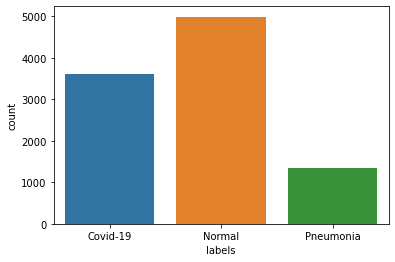

In [10]:
df=pd.DataFrame(target,columns=['labels'])
sns.countplot(df['labels'])
plt.show()

In [11]:
size=[]
for file in imgpath: 
    img=plt.imread(file) 
    size.append(img.shape) 
pd.Series(size).value_counts() 

(299, 299)       9811
(299, 299, 3)     140
dtype: int64

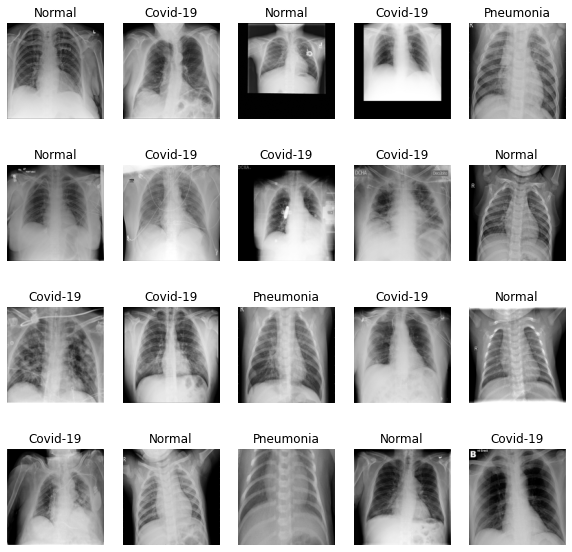

In [12]:
plt.figure(figsize=(10,10)) 
for c , i in enumerate(list(np.random.randint(0,len(imgpath),20))) : 
    plt.subplot(4,5,c+1)
    plt.imshow(data[i] , cmap='gray')
    plt.title(target[i])
    plt.axis('off')     
plt.show()

In [13]:
le=LabelEncoder() 
labels=le.fit_transform(target) 
labels=to_categorical(labels)

print(le.classes_)
print(labels[0])

['Covid-19' 'Normal' 'Pneumonia']
[1. 0. 0.]


In [14]:
(trainX, testX, trainY, testY)=train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(trainY)
testY=np.array(testY)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(7960, 150, 150, 3)
(1991, 150, 150, 3)
(7960, 3)
(1991, 3)


In [15]:
trainX[0]

array([[[0.14901961, 0.14901961, 0.14901961],
        [0.16078431, 0.16078431, 0.16078431],
        [0.19215686, 0.19215686, 0.19215686],
        ...,
        [0.4       , 0.4       , 0.4       ],
        [0.38823529, 0.38823529, 0.38823529],
        [0.61960784, 0.61960784, 0.61960784]],

       [[0.25490196, 0.25490196, 0.25490196],
        [0.27843137, 0.27843137, 0.27843137],
        [0.28627451, 0.28627451, 0.28627451],
        ...,
        [0.63137255, 0.63137255, 0.63137255],
        [0.60392157, 0.60392157, 0.60392157],
        [0.67843137, 0.67843137, 0.67843137]],

       [[0.29019608, 0.29019608, 0.29019608],
        [0.34117647, 0.34117647, 0.34117647],
        [0.37254902, 0.37254902, 0.37254902],
        ...,
        [0.43921569, 0.43921569, 0.43921569],
        [0.63529412, 0.63529412, 0.63529412],
        [0.83921569, 0.83921569, 0.83921569]],

       ...,

       [[0.79607843, 0.79607843, 0.79607843],
        [0.8       , 0.8       , 0.8       ],
        [0.78823529, 0

In [16]:
from tensorflow.keras import backend as K
K.clear_session()

In [17]:
s=150
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(s,s,3), kernel_initializer='he_normal'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

In [18]:
model.compile(optimizer=Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [19]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 33, 33, 128)       0

In [20]:
data=[]
imgpath=[]
df=[]
size=[]

In [21]:
epochs=30
batch_size=128

ThisModel=model.fit(trainX, trainY, batch_size, steps_per_epoch=len(trainX) // batch_size, validation_data=(testX, testY), validation_steps=len(testX) // batch_size, epochs=epochs, verbose=1)

Epoch 1/30
62/62 [==============================] - 182s 3s/step - loss: 1.1520 - accuracy: 0.6633 - val_loss: 0.3895 - val_accuracy: 0.8344
Epoch 2/30
62/62 [==============================] - 200s 3s/step - loss: 0.4112 - accuracy: 0.8308 - val_loss: 0.3331 - val_accuracy: 0.8698
Epoch 3/30
62/62 [==============================] - 189s 3s/step - loss: 0.3420 - accuracy: 0.8639 - val_loss: 0.2917 - val_accuracy: 0.8922
Epoch 4/30
62/62 [==============================] - 225s 4s/step - loss: 0.2758 - accuracy: 0.8940 - val_loss: 0.2331 - val_accuracy: 0.9120
Epoch 5/30
62/62 [==============================] - 199s 3s/step - loss: 0.2420 - accuracy: 0.9072 - val_loss: 0.2448 - val_accuracy: 0.9104
Epoch 6/30
62/62 [==============================] - 201s 3s/step - loss: 0.2067 - accuracy: 0.9210 - val_loss: 0.2055 - val_accuracy: 0.9297
Epoch 7/30
62/62 [==============================] - 186s 3s/step - loss: 0.1825 - accuracy: 0.9316 - val_loss: 0.1947 - val_accuracy: 0.9349
Epoch 8/30
62

In [22]:
model.save('C:/Users/DELL/Desktop/Major Project/CNN-Dataset/CPN_Model.h5')

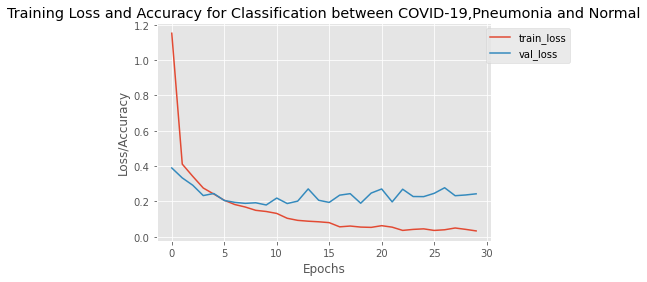

In [23]:
n=epochs
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), ThisModel.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), ThisModel.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy for Classification between COVID-19,Pneumonia and Normal")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.savefig("plot.png")

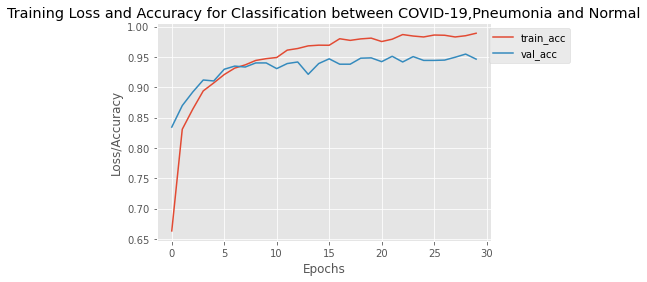

In [24]:
n=epochs
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), ThisModel.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), ThisModel.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Classification between COVID-19,Pneumonia and Normal")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.savefig("plot.png")

In [25]:
modelLoss, modelAccuracy=model.evaluate(testX, testY, verbose=0)

print('Test Loss is: {}'.format(modelLoss))
print('Test Accuracy is: {}'.format(modelAccuracy ))

Test Loss is: 0.24832069873809814
Test Accuracy is: 0.9452536702156067


In [26]:
modelLoss=[]
modelAccuracy=[]

In [27]:
predIdxs = model.predict (trainX, batch_size=64)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits=3))

              precision    recall  f1-score   support

    Covid-19      0.999     1.000     0.999      2892
      Normal      0.999     0.998     0.999      3992
   Pneumonia      0.997     0.998     0.998      1076

    accuracy                          0.999      7960
   macro avg      0.998     0.999     0.999      7960
weighted avg      0.999     0.999     0.999      7960



In [28]:
predIdxs=[]

In [29]:
predIdxs=model.predict(testX, batch_size=64)
predIdxs=np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits=3))

              precision    recall  f1-score   support

    Covid-19      0.937     0.952     0.944       724
      Normal      0.946     0.953     0.950       998
   Pneumonia      0.964     0.900     0.931       269

    accuracy                          0.945      1991
   macro avg      0.949     0.935     0.942      1991
weighted avg      0.945     0.945     0.945      1991



In [30]:
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(testY.argmax(axis=1), predIdxs)
print(confusionmatrix)

[[689  31   4]
 [ 42 951   5]
 [  4  23 242]]


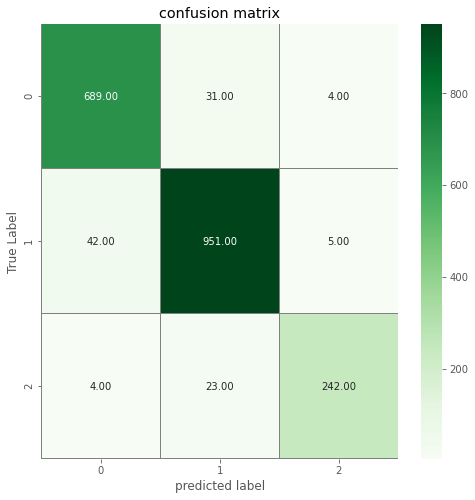

In [31]:
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(testY.argmax(axis=1), predIdxs)
f,ax = plt.subplots(figsize = (8,8))
sns.heatmap(confusionmatrix,annot=True,linewidths = 0.01,cmap="Greens",
            linecolor = "gray",fmt = ".2f",ax=ax
            )
plt.xlabel("predicted label")
plt.ylabel("True Label")
plt.title("confusion matrix")
plt.show()

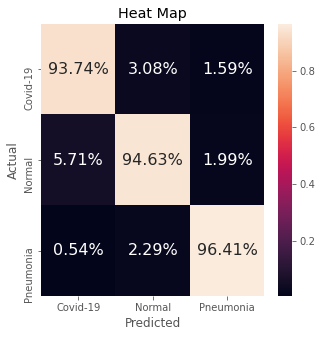

In [32]:
df_cm=pd.DataFrame(confusionmatrix, columns=le.classes_, index=le.classes_)
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(5,5))
sns.heatmap(df_cm/np.sum(df_cm), fmt='.2%', annot=True, annot_kws={'size':16})
plt.title("Heat Map")
plt.show()

In [33]:
from tensorflow import keras
model=keras.models.load_model('C:/Users/DELL/Desktop/Major Project/CNN-Dataset/CPN_Model.h5')

In [34]:
from numpy import asarray
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [35]:
covid_img_path="C:/Users/DELL/Desktop/Major Project/CNN-Dataset/COVID/COVID-19.png"
normal_img_path="C:/Users/DELL/Desktop/Major Project/CNN-Dataset/Normal/Normal-500.png"
pneumonia_img_path="C:/Users/DELL/Desktop/Major Project/CNN-Dataset/Viral Pneumonia/Viral Pneumonia-1000.png"

img_paths=[covid_img_path, normal_img_path, pneumonia_img_path]

In [36]:
print(img_paths)

['C:/Users/DELL/Desktop/Major Project/CNN-Dataset/COVID/COVID-19.png', 'C:/Users/DELL/Desktop/Major Project/CNN-Dataset/Normal/Normal-500.png', 'C:/Users/DELL/Desktop/Major Project/CNN-Dataset/Viral Pneumonia/Viral Pneumonia-1000.png']


In [37]:
resize=150

images=[]

for img_path in img_paths:
  img_path=cv2.imread(img_path)
  img_path=cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB) 
  img_path=cv2.resize(img_path, (resize, resize)) /255
  images.append(img_path)

In [38]:
count=0
for _ in images:
  images[count]=np.array(images[count])
  images[count]=np.expand_dims(images[count], axis=0)
  print(images[count].shape)
  count+=1

(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)


In [39]:
prediction=[]
for i in images:
  prediction.append(model.predict(i))
print(prediction)

[array([[8.1003004e-01, 1.8996988e-01, 9.2760310e-08]], dtype=float32), array([[7.1984953e-13, 9.9986815e-01, 1.3177532e-04]], dtype=float32), array([[7.4807138e-14, 2.3789713e-04, 9.9976212e-01]], dtype=float32)]


In [40]:
output=[]
for p in prediction:
  output.append(np.argmax(p,axis=1))
print(output)

[array([0], dtype=int64), array([1], dtype=int64), array([2], dtype=int64)]


In [41]:
title=[]

for out in output:
  if out==0:
    title.append('COVID-19')
  elif out==1:
    title.append('Normal')
  else:
    title.append('Pneumonia')

print(title)

['COVID-19', 'Normal', 'Pneumonia']


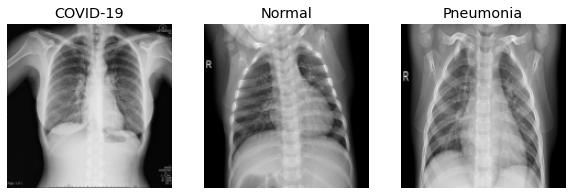

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

i=0

for img in images:
  plt.subplot(1,3,i+1)
  plt.imshow(np.squeeze(img) , cmap='gray')
  plt.title(title[i])
  plt.axis('off')  
  i+=1   
plt.show()